# Employee Retention - Capstone Project (Task 1) --> Sai Rakesh Kothapalli

## Company : Idea Spice

### Business Objectives

Analyzing employee retention and satisfaction can help businesses identify key factors that affect employee turnover and job satisfaction. By identifying these factors, businesses can take steps to address them, such as improving compensation and benefits, providing better training and development opportunities, and creating a more positive work environment. This can ultimately lead to a more motivated and productive workforce, lower turnover rates, and improved business performance.



### Problem Statement

The challenge of employee attrition poses significant costs and disruptions to a company. By conducting an in-depth analysis of employee data, including factors such as job satisfaction, work-life balance, compensation, performance, and career growth opportunities, companies can gain valuable insights into the key drivers that influence employee retention. This analysis aims to identify patterns and correlations to help organizations understand the factors that contribute to employee satisfaction and engagement, enabling them to implement targeted strategies and initiatives to improve employee retention, boost morale, increase productivity, and ultimately enhance the overall success and stability of the company.

## Task - Sanity check and data cleaning

##### Running basic Libraries in Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## 1. Import the dataset

In [2]:
df1 = pd.read_csv("Employee_Behaviour.csv")
df2 = pd.read_csv("Employee_Profile.csv")
df3 = pd.read_csv("Employee_Salary.csv")
df4 = pd.read_csv("Employee_Satisfaction.csv")

In [3]:
df1.head()

,EmployeId,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,TrainingTimesLastYear
0,IDSL227,13,8,4,1,1
1,IDSL030,8,7,7,7,2
2,IDRD581,7,7,0,7,2
3,IDRD633,10,9,1,8,3
4,IDRD122,6,2,0,1,3


In [4]:
df2.head()

,Name,EmployeId,Gender,Age,MaritalStatus,EducationField,Qualifications,Vertical,Role,Work Experience,DistanceFromHome
0,Aaliyah,IDSL227,F,40,Single,Medical,3,Sales,Sales Executive,1,2
1,Aaron,IDSL030,M,46,Married,Marketing,4,Sales,Sales Executive,9,23
2,Abby,IDRD581,F,49,Single,Medical,3,Research & Development,Research Director,5,13
3,Abel,IDRD633,M,29,Married,Life Sciences,5,Research & Development,Healthcare Representative,1,13
4,Abigail,IDRD122,F,54,Married,Medical,3,Research & Development,Research Director,2,1


In [5]:
df3.head()

,EmployeId,Daily,Hour,Monthly,MonthlyRate,OverTime,Hours
0,IDSL227,129,97,6287,4984,Yes,80
1,IDSL030,134,64,4866,24079,No,80
2,IDRD581,934,82,19833,25706,Yes,80
3,IDRD633,1201,32,7854,3642,No,80
4,IDRD122,1478,42,18731,13254,No,80


In [6]:
df4.head()

,EmployeId,Turnover,Travelling,Satisfaction,Engagement,JobLevel,Last Rating,SalaryHike,Work&Life
0,IDSL227,No,Sometimes,4,2,2,4,23,3
1,IDSL030,No,No,4,3,2,3,18,3
2,IDRD581,No,Sometimes,4,3,4,3,14,4
3,IDRD633,No,Sometimes,4,3,3,3,19,2
4,IDRD122,No,Sometimes,1,1,4,3,13,3


In [7]:
# Here the employee ID is common for all the Data sets. So, we concatenate all the datasets on the basis of employeid

## 2. Concatenate the dataset on the basis of employeid

In [8]:
dataset = pd.merge(df1, df2, on="EmployeId")

In [9]:
dataset = pd.merge(dataset, df3, on="EmployeId")
dataset = pd.merge(dataset, df4, on="EmployeId")

In [10]:
dataset.head()

,EmployeId,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,TrainingTimesLastYear,Name,Gender,Age,MaritalStatus,...,OverTime,Hours,Turnover,Travelling,Satisfaction,Engagement,JobLevel,Last Rating,SalaryHike,Work&Life
0,IDSL227,13,8,4,1,1,Aaliyah,F,40,Single,...,Yes,80,No,Sometimes,4,2,2,4,23,3
1,IDSL030,8,7,7,7,2,Aaron,M,46,Married,...,No,80,No,No,4,3,2,3,18,3
2,IDRD581,7,7,0,7,2,Abby,F,49,Single,...,Yes,80,No,Sometimes,4,3,4,3,14,4
3,IDRD633,10,9,1,8,3,Abel,M,29,Married,...,No,80,No,Sometimes,4,3,3,3,19,2
4,IDRD122,6,2,0,1,3,Abigail,F,54,Married,...,No,80,No,Sometimes,1,1,4,3,13,3


## 3. Using python Check for missing values, duplicate entries and irrelevant columns

In [11]:
# Checking for missing values

In [12]:
missing_values = dataset.isnull().sum()
print(missing_values)

EmployeId                  0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrentManager    0
TrainingTimesLastYear      0
Name                       0
Gender                     0
Age                        0
MaritalStatus              0
EducationField             0
Qualifications             0
Vertical                   0
Role                       0
Work Experience            0
DistanceFromHome           0
Daily                      0
Hour                       0
Monthly                    0
MonthlyRate                0
OverTime                   0
Hours                      0
Turnover                   0
Travelling                 0
Satisfaction               0
Engagement                 0
JobLevel                   0
Last Rating                0
SalaryHike                 0
Work&Life                  0
dtype: int64


In [13]:
# Checking for duplicate entries

In [14]:
duplicate_entries = dataset.duplicated().sum()
print(duplicate_entries)

0


In [15]:
# Checking for irrelevant columns

In [16]:
dataset.nunique()

EmployeId                  1470
YearsAtCompany               33
YearsInCurrentRole           18
YearsSinceLastPromotion      16
YearsWithCurrentManager      18
TrainingTimesLastYear         7
Name                       1434
Gender                        2
Age                          42
MaritalStatus                 3
EducationField                6
Qualifications                5
Vertical                      3
Role                          9
Work Experience              10
DistanceFromHome             29
Daily                       889
Hour                         71
Monthly                    1321
MonthlyRate                1367
OverTime                      2
Hours                         1
Turnover                      2
Travelling                    3
Satisfaction                  4
Engagement                    4
JobLevel                      5
Last Rating                   2
SalaryHike                   15
Work&Life                     4
dtype: int64

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeId                1470 non-null   object
 1   YearsAtCompany           1470 non-null   int64 
 2   YearsInCurrentRole       1470 non-null   int64 
 3   YearsSinceLastPromotion  1470 non-null   int64 
 4   YearsWithCurrentManager  1470 non-null   int64 
 5   TrainingTimesLastYear    1470 non-null   int64 
 6   Name                     1470 non-null   object
 7   Gender                   1470 non-null   object
 8   Age                      1470 non-null   int64 
 9   MaritalStatus            1470 non-null   object
 10  EducationField           1470 non-null   object
 11  Qualifications           1470 non-null   int64 
 12  Vertical                 1470 non-null   object
 13  Role                     1470 non-null   object
 14  Work Experience          1470 non-null  

### 3. Handle missing values by either removing rows/columns or filling them with appropriate values

In [18]:
# The dataset doesn't have any missing values, duplicate entries and irrelevant columns

### 4. Convert categorical variables to numerical variables using one-hot encoding or label encoding

In [19]:
dataset.describe()

,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,TrainingTimesLastYear,Age,Qualifications,Work Experience,DistanceFromHome,Daily,Hour,Monthly,MonthlyRate,Hours,Satisfaction,Engagement,JobLevel,Last Rating,SalaryHike,Work&Life
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,6.772109,4.066667,2.095238,3.945578,2.769388,37.065306,2.876190,2.659184,9.278231,763.046939,65.074830,6752.281633,14539.982313,80.0,2.702041,2.712245,2.087075,3.162585,15.122449,2.798639
std,5.777745,3.741427,3.261537,3.702486,1.350900,9.522562,1.019038,2.501769,8.157120,426.331994,20.604377,5141.197951,7172.390592,0.0,1.095039,0.731141,1.109663,0.369112,3.817658,0.714718
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,1.000000,0.000000,1.000000,107.000000,30.000000,1102.000000,2125.000000,80.0,1.000000,1.000000,1.000000,3.000000,11.000000,1.000000
25%,3.000000,2.000000,0.000000,1.000000,2.000000,30.000000,2.000000,1.000000,2.000000,403.750000,47.000000,2919.250000,8688.750000,80.0,2.000000,2.000000,1.000000,3.000000,12.000000,2.000000
50%,5.000000,3.000000,1.000000,2.000000,2.000000,36.000000,3.000000,1.000000,7.000000,704.500000,66.000000,4854.000000,14717.500000,80.0,3.000000,3.000000,2.000000,3.000000,14.000000,3.000000
75%,9.000000,7.000000,2.000000,7.000000,3.000000,44.000000,4.000000,4.000000,15.000000,1151.000000,83.000000,8838.500000,20455.500000,80.0,4.000000,3.000000,3.000000,3.000000,18.000000,3.000000
max,33.000000,17.000000,15.000000,17.000000,6.000000,59.000000,5.000000,9.000000,29.000000,1495.000000,100.000000,19847.000000,26933.000000,80.0,4.000000,4.000000,5.000000,4.000000,25.000000,4.000000


In [20]:
dataset.describe(include = 'object')

,EmployeId,Name,Gender,MaritalStatus,EducationField,Vertical,Role,OverTime,Turnover,Travelling
count,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,1470,1434,2,3,6,3,9,2,2,3
top,IDSL227,Jody,F,Married,Life Sciences,Research & Development,Sales Executive,No,No,Sometimes
freq,1,2,817,659,603,965,323,1069,1203,999


In [21]:
# Select columns of categorical data type
categorical_columns = dataset.select_dtypes(include=['object', 'category'])

# Print the list of categorical columns
print(categorical_columns.columns.tolist())

['EmployeId', 'Name', 'Gender', 'MaritalStatus', 'EducationField', 'Vertical', 'Role', 'OverTime', 'Turnover', 'Travelling']


### 5. Convert the target variable to 0s and 1s

In [22]:
import sklearn

In [23]:
from sklearn import preprocessing
sklearn.preprocessing.LabelEncoder

sklearn.preprocessing._label.LabelEncoder

In [24]:
le = preprocessing.LabelEncoder()

In [25]:
dataset['Turnover']= le.fit_transform(dataset['Turnover'])
  
dataset['Turnover'].unique()

array([0, 1])

In [26]:
dataset['Turnover']

0       0
1       0
2       0
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Turnover, Length: 1470, dtype: int32

In [27]:
# Here the Target Variable was 'Turnover'. So we converted 'Turnover' from  Categorical to Numerical variable

### 6. Remove outliers and extreme values, if any

In [28]:
dataset.describe()

,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,TrainingTimesLastYear,Age,Qualifications,Work Experience,DistanceFromHome,Daily,...,Monthly,MonthlyRate,Hours,Turnover,Satisfaction,Engagement,JobLevel,Last Rating,SalaryHike,Work&Life
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,6.772109,4.066667,2.095238,3.945578,2.769388,37.065306,2.876190,2.659184,9.278231,763.046939,...,6752.281633,14539.982313,80.0,0.181633,2.702041,2.712245,2.087075,3.162585,15.122449,2.798639
std,5.777745,3.741427,3.261537,3.702486,1.350900,9.522562,1.019038,2.501769,8.157120,426.331994,...,5141.197951,7172.390592,0.0,0.385673,1.095039,0.731141,1.109663,0.369112,3.817658,0.714718
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,1.000000,0.000000,1.000000,107.000000,...,1102.000000,2125.000000,80.0,0.000000,1.000000,1.000000,1.000000,3.000000,11.000000,1.000000
25%,3.000000,2.000000,0.000000,1.000000,2.000000,30.000000,2.000000,1.000000,2.000000,403.750000,...,2919.250000,8688.750000,80.0,0.000000,2.000000,2.000000,1.000000,3.000000,12.000000,2.000000
50%,5.000000,3.000000,1.000000,2.000000,2.000000,36.000000,3.000000,1.000000,7.000000,704.500000,...,4854.000000,14717.500000,80.0,0.000000,3.000000,3.000000,2.000000,3.000000,14.000000,3.000000
75%,9.000000,7.000000,2.000000,7.000000,3.000000,44.000000,4.000000,4.000000,15.000000,1151.000000,...,8838.500000,20455.500000,80.0,0.000000,4.000000,3.000000,3.000000,3.000000,18.000000,3.000000
max,33.000000,17.000000,15.000000,17.000000,6.000000,59.000000,5.000000,9.000000,29.000000,1495.000000,...,19847.000000,26933.000000,80.0,1.000000,4.000000,4.000000,5.000000,4.000000,25.000000,4.000000


In [29]:
pd.set_option('display.max_columns', None)

In [30]:
dataset.describe().all()

YearsAtCompany             False
YearsInCurrentRole         False
YearsSinceLastPromotion    False
YearsWithCurrentManager    False
TrainingTimesLastYear      False
Age                         True
Qualifications              True
Work Experience            False
DistanceFromHome            True
Daily                       True
Hour                        True
Monthly                     True
MonthlyRate                 True
Hours                      False
Turnover                   False
Satisfaction                True
Engagement                  True
JobLevel                    True
Last Rating                 True
SalaryHike                  True
Work&Life                   True
dtype: bool

<Axes: xlabel='Age'>

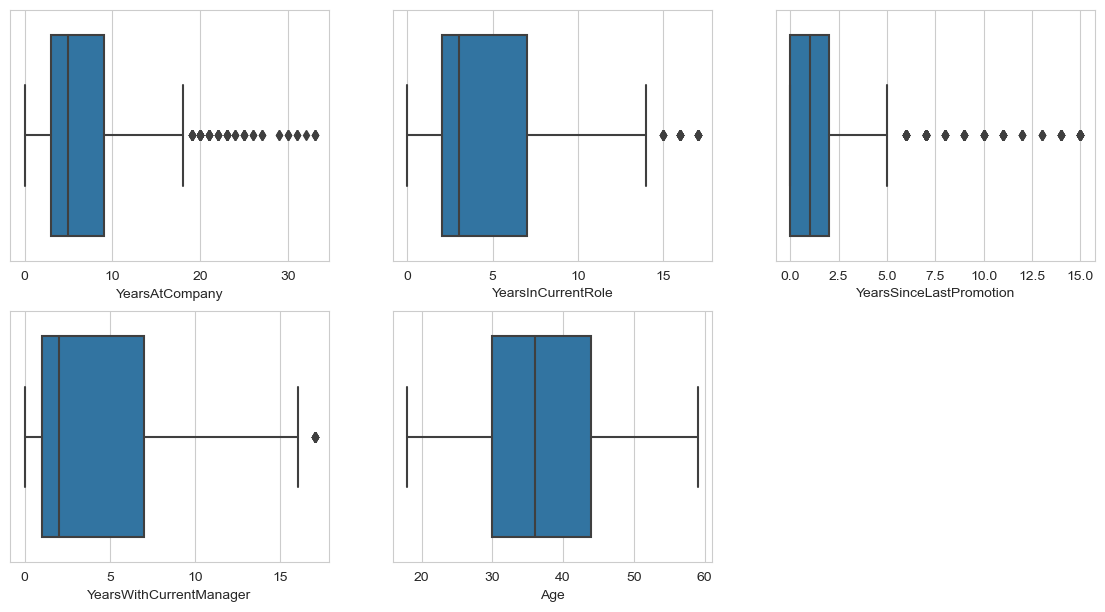

In [31]:
# Setting up the plots
plt.figure(figsize=(14,15))
sns.set_style(style='whitegrid')

    # Plot 1 
plt.subplot(4,3,1)
sns.boxplot(x='YearsAtCompany',data=dataset)

    # Plot 2
plt.subplot(4,3,2)
sns.boxplot(x='YearsInCurrentRole',data=dataset)

    # Plot 3 
plt.subplot(4,3,3)
sns.boxplot(x='YearsSinceLastPromotion',data=dataset)

    # Plot 4
plt.subplot(4,3,4)
sns.boxplot(x='YearsWithCurrentManager',data=dataset)

    # Plot 5
plt.subplot(4,3,5)
sns.boxplot(x='Age',data=dataset)

 

In [41]:
# Here from the above Boxplots, we have outliers for "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion"

<Axes: xlabel='Monthly'>

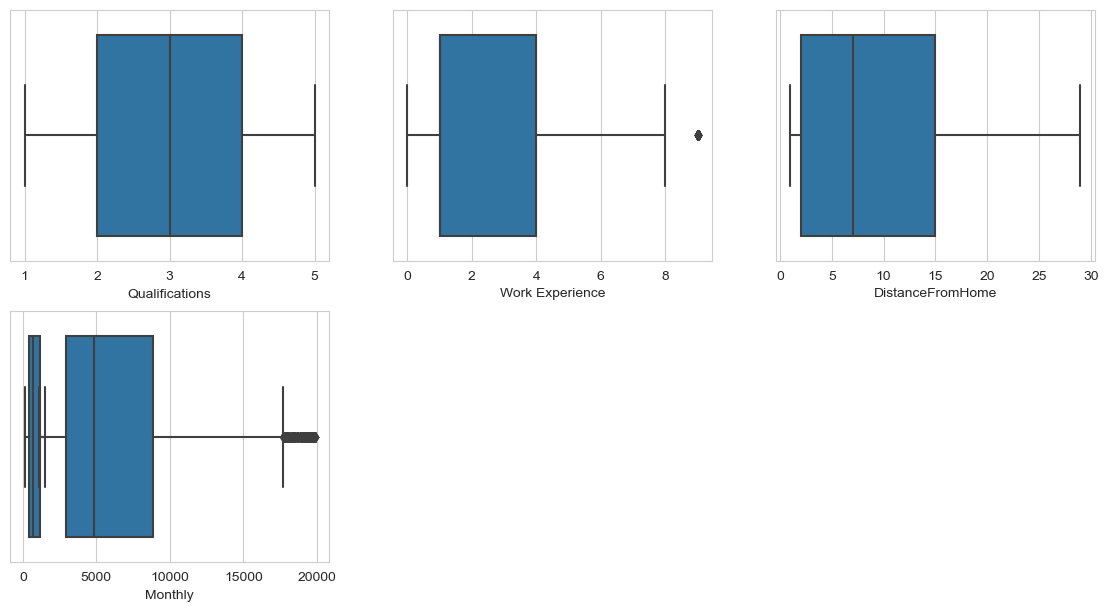

In [32]:
# Setting up the plots
plt.figure(figsize=(14,15))
sns.set_style(style='whitegrid') 
    
    # Plot 6
plt.subplot(4,3,1)
sns.boxplot(x='Qualifications',data=dataset)

    # Plot 7
plt.subplot(4,3,2)
sns.boxplot(x='Work Experience',data=dataset)

    # Plot 8 
plt.subplot(4,3,3)
sns.boxplot(x='DistanceFromHome',data=dataset)

    # Plot 9
plt.subplot(4,3,4)
sns.boxplot(x='Daily',data=dataset)

    # Plot 10
plt.subplot(4,3,4)
sns.boxplot(x='Monthly',data=dataset)


 

In [42]:
# Here from the above Boxplots, we have outliers for "Work Experience" and "Monthly"

<Axes: xlabel='Engagement'>

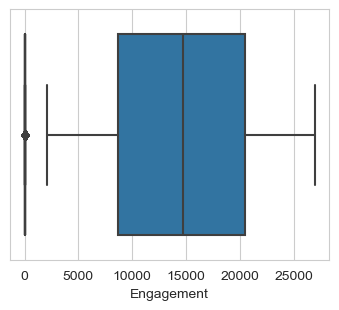

In [33]:
 # Setting up the plots
plt.figure(figsize=(14,15))
sns.set_style(style='whitegrid')
    
    
    # Plot 11
plt.subplot(4,3,5)
sns.boxplot(x='MonthlyRate',data=dataset)


    # Plot 12
plt.subplot(4,3,5)
sns.boxplot(x='Hours',data=dataset)


    # Plot 13
plt.subplot(4,3,5)
sns.boxplot(x='Turnover',data=dataset)


    # Plot 14
plt.subplot(4,3,5)
sns.boxplot(x='Satisfaction',data=dataset)


    # Plot 15
plt.subplot(4,3,5)
sns.boxplot(x='Engagement',data=dataset)

 

<Axes: xlabel='Work&Life'>

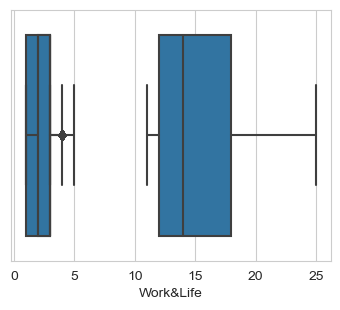

In [34]:
# Setting up the plots
plt.figure(figsize=(14,15))
sns.set_style(style='whitegrid') 
    
    # Plot 16
plt.subplot(4,3,5)
sns.boxplot(x='JobLevel',data=dataset)

    # Plot 17
plt.subplot(4,3,5)
sns.boxplot(x='Last Rating',data=dataset)

    # Plot 18
plt.subplot(4,3,5)
sns.boxplot(x='SalaryHike',data=dataset)

    # Plot 19
plt.subplot(4,3,5)
sns.boxplot(x='Work&Life',data=dataset)

### 7. Perform basic feature engineering by creating new variables or combining existing variables, if necessary. Examples could include creating age groups, income brackets, or a ratio of income to credit limit.

In [60]:
dataset['Age'].unique()

array([40, 46, 49, 29, 54, 33, 35, 25, 27, 32, 41, 31, 36, 51, 42, 30, 34,
       44, 22, 39, 50, 56, 38, 48, 45, 37, 21, 24, 18, 23, 26, 55, 28, 52,
       47, 43, 19, 57, 59, 58, 20, 53], dtype=int64)

In [63]:
# Define age group boundaries
age_bins = [0, 18, 25, 35, 50, 100]
age_labels = ['18-25', '26-35', '36-50', '51-59']

In [64]:
# Create a new column 'age_group' based on age bins
data['age_group'] = pd.cut(dataset['Age'], bins=age_bins, labels=age_labels)
data['age_group']

ValueError: Bin labels must be one fewer than the number of bin edges

In [67]:

# Define income bracket boundaries
MonthlyRate_bins = [0, 30000, 60000, 90000, np.inf]
MonthlyRate_labels = ['Low', 'Medium', 'High', 'Very High']

# Create a new column 'income_bracket' based on income bins
dataset['MonthlyRate'] = pd.cut(dataset['MonthlyRate'], bins=MonthlyRate_bins, labels=MonthlyRate_labels)

### 8. Check for any correlations between variables, and handle any multicollinearity issues

In [35]:
dataset.corr()

C:\Users\USER\AppData\Local\Temp\ipykernel_8488\2191645083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,TrainingTimesLastYear,Age,Qualifications,Work Experience,DistanceFromHome,Daily,Hour,Monthly,MonthlyRate,Hours,Turnover,Satisfaction,Engagement,JobLevel,Last Rating,SalaryHike,Work&Life
YearsAtCompany,1.000000,0.603121,0.535934,0.631212,-0.050259,0.274847,0.081110,-0.046538,0.014822,-0.003492,-0.012597,0.403145,0.059068,NaN,-0.115218,0.003570,0.003803,0.460718,-0.002086,-0.027868,-0.011615
YearsInCurrentRole,0.603121,1.000000,0.513205,0.631385,-0.020122,0.166661,0.101081,-0.074516,0.002046,0.016156,-0.015359,0.259666,0.061384,NaN,-0.157946,0.016150,-0.035287,0.333744,-0.023628,-0.038890,-0.019924
YearsSinceLastPromotion,0.535934,0.513205,1.000000,0.494247,-0.031783,0.243112,0.077899,-0.000191,0.059849,0.010464,-0.017225,0.308181,-0.046310,NaN,-0.034867,-0.009775,0.016924,0.344168,0.023884,-0.004491,-0.037908
YearsWithCurrentManager,0.631212,0.631385,0.494247,1.000000,-0.026737,0.211945,0.083012,-0.047348,0.018624,-0.052963,-0.015714,0.307545,0.059022,NaN,-0.136566,0.015978,0.008545,0.362688,-0.000993,-0.022356,-0.009032
TrainingTimesLastYear,-0.050259,-0.020122,-0.031783,-0.026737,1.000000,0.008368,0.025234,-0.031731,-0.039455,0.024635,0.020186,-0.009758,-0.012401,NaN,0.016428,0.046934,0.002378,-0.055621,-0.027145,0.003103,0.004046
Age,0.274847,0.166661,0.243112,0.211945,0.008368,1.000000,0.168775,0.263648,-0.000681,-0.015840,0.033740,0.450740,-0.034034,NaN,-0.154667,0.000039,0.055303,0.477536,-0.000699,-0.016923,0.027239
Qualifications,0.081110,0.101081,0.077899,0.083012,0.025234,0.168775,1.000000,0.069417,0.027077,-0.005173,0.003911,0.082919,-0.002374,NaN,-0.015490,-0.021491,0.065444,0.103452,-0.064084,-0.045970,-0.026776
Work Experience,-0.046538,-0.074516,-0.000191,-0.047348,-0.031731,0.263648,0.069417,1.000000,-0.019835,0.006540,-0.014679,0.170346,0.014936,NaN,-0.047977,-0.007772,0.037899,0.178912,-0.004825,-0.013589,0.013370
DistanceFromHome,0.014822,0.002046,0.059849,0.018624,-0.039455,-0.000681,0.027077,-0.019835,1.000000,-0.057532,-0.032421,0.024039,0.010122,NaN,0.067449,-0.016548,0.018798,0.030187,0.016844,0.010054,0.024562
Daily,-0.003492,0.016156,0.010464,-0.052963,0.024635,-0.015840,-0.005173,0.006540,-0.057532,1.000000,-0.036091,-0.010337,-0.036442,NaN,-0.048835,0.005733,-0.029437,-0.032321,0.005692,0.003223,-0.017998


In [43]:
import pandas as pd
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
correlation_matrix = dataset.corr()

C:\Users\USER\AppData\Local\Temp\ipykernel_8488\1823223475.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


In [ ]:
#This will display a heatmap where highly correlated variables will have colors closer to red or blue.

<Axes: >

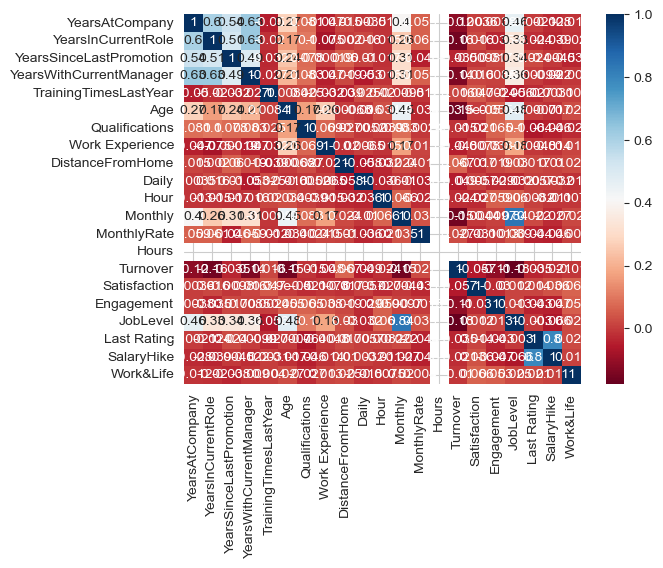

In [59]:
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu')

### 9. Check the distribution of the variables and transform them if needed to normalize the data

In [39]:
dataset.describe()

,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,TrainingTimesLastYear,Age,Qualifications,Work Experience,DistanceFromHome,Daily,Hour,Monthly,MonthlyRate,Hours,Turnover,Satisfaction,Engagement,JobLevel,Last Rating,SalaryHike,Work&Life
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,6.772109,4.066667,2.095238,3.945578,2.769388,37.065306,2.876190,2.659184,9.278231,763.046939,65.074830,6752.281633,14539.982313,80.0,0.181633,2.702041,2.712245,2.087075,3.162585,15.122449,2.798639
std,5.777745,3.741427,3.261537,3.702486,1.350900,9.522562,1.019038,2.501769,8.157120,426.331994,20.604377,5141.197951,7172.390592,0.0,0.385673,1.095039,0.731141,1.109663,0.369112,3.817658,0.714718
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,1.000000,0.000000,1.000000,107.000000,30.000000,1102.000000,2125.000000,80.0,0.000000,1.000000,1.000000,1.000000,3.000000,11.000000,1.000000
25%,3.000000,2.000000,0.000000,1.000000,2.000000,30.000000,2.000000,1.000000,2.000000,403.750000,47.000000,2919.250000,8688.750000,80.0,0.000000,2.000000,2.000000,1.000000,3.000000,12.000000,2.000000
50%,5.000000,3.000000,1.000000,2.000000,2.000000,36.000000,3.000000,1.000000,7.000000,704.500000,66.000000,4854.000000,14717.500000,80.0,0.000000,3.000000,3.000000,2.000000,3.000000,14.000000,3.000000
75%,9.000000,7.000000,2.000000,7.000000,3.000000,44.000000,4.000000,4.000000,15.000000,1151.000000,83.000000,8838.500000,20455.500000,80.0,0.000000,4.000000,3.000000,3.000000,3.000000,18.000000,3.000000
max,33.000000,17.000000,15.000000,17.000000,6.000000,59.000000,5.000000,9.000000,29.000000,1495.000000,100.000000,19847.000000,26933.000000,80.0,1.000000,4.000000,4.000000,5.000000,4.000000,25.000000,4.000000


In [46]:
#Check the distribution of variables using histograms:

In [50]:
#This will display histograms for each variable, allowing you to visually inspect their distributions.

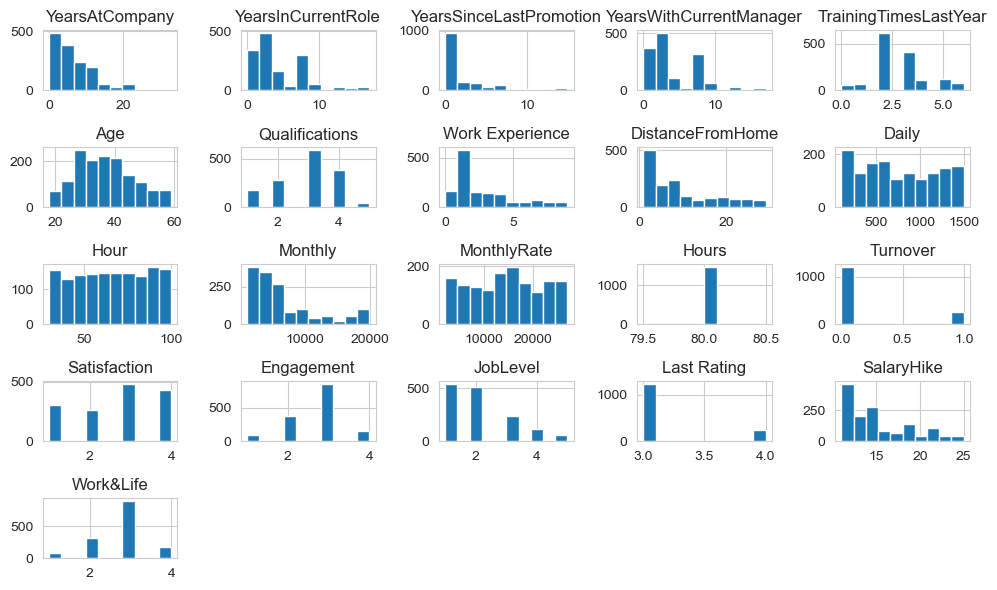

In [47]:
dataset.hist(bins=10, figsize=(10, 6))
plt.tight_layout()
plt.show()

In [48]:
#Check the skewness and kurtosis of variables:

In [52]:
#Skewness measures the asymmetry of the distribution
#Kurtosis measures the tailedness or thickness of the distribution. 
#Values close to zero indicate normal distribution.

In [53]:
skewness = dataset.skew()
kurtosis = dataset.kurtosis()

print("Skewness:")
print(skewness)
print("\nKurtosis:")
print(kurtosis)

Skewness:
YearsAtCompany             1.618834
YearsInCurrentRole         1.176682
YearsSinceLastPromotion    2.209494
YearsWithCurrentManager    1.072928
TrainingTimesLastYear      0.619843
Age                        0.309846
Qualifications            -0.287690
Work Experience            1.134661
DistanceFromHome           0.882660
Daily                      0.123899
Hour                      -0.052079
Monthly                    1.304112
MonthlyRate               -0.016495
Hours                      0.000000
Turnover                   1.653221
Satisfaction              -0.324228
Engagement                -0.498928
JobLevel                   0.938151
Last Rating                1.830742
SalaryHike                 0.917203
Work&Life                 -0.557695
dtype: float64

Kurtosis:
YearsAtCompany             3.125568
YearsInCurrentRole         1.309247
YearsSinceLastPromotion    4.787841
YearsWithCurrentManager    0.867401
TrainingTimesLastYear      0.335005
Age                       -0

C:\Users\USER\AppData\Local\Temp\ipykernel_8488\586111889.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = dataset.skew()
C:\Users\USER\AppData\Local\Temp\ipykernel_8488\586111889.py:2: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  kurtosis = dataset.kurtosis()
